<a href="https://colab.research.google.com/github/przetoka/BD1-Project/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Zadanie 1

In [3]:
import numpy as np
import pandas as pd
from matplotlib.lines import Line2D

In [7]:
df = pd.read_csv('treatment.csv')
df

,concentration 1,concentration 2,was treatment effective?
0,0.039,4068.333,0
1,0.081,5512.921,0
2,0.000,5990.161,1
3,0.000,7602.887,1
4,0.048,6325.037,0
...,...,...,...
1189,0.132,1721.120,1
1190,0.069,8702.103,0
1191,0.010,9239.395,0
1192,0.111,8294.938,0


In [8]:
df_max_scaled = df.copy()

for column in df_max_scaled.columns:
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
      
# view normalized data
display(df_max_scaled)

,concentration 1,concentration 2,was treatment effective?
0,0.293233,0.440325,0.0
1,0.609023,0.596676,0.0
2,0.000000,0.648328,1.0
3,0.000000,0.822877,1.0
4,0.360902,0.684573,0.0
...,...,...,...
1189,0.992481,0.186281,1.0
1190,0.518797,0.941848,0.0
1191,0.075188,1.000000,0.0
1192,0.834586,0.897779,0.0


In [9]:
X, y = df_max_scaled.iloc[:,:2], df_max_scaled.iloc[:,2]
X, y

(      concentration 1   concentration 2
 0            0.293233          0.440325
 1            0.609023          0.596676
 2            0.000000          0.648328
 3            0.000000          0.822877
 4            0.360902          0.684573
 ...               ...               ...
 1189         0.992481          0.186281
 1190         0.518797          0.941848
 1191         0.075188          1.000000
 1192         0.834586          0.897779
 1193         0.947368          0.578105
 
 [1194 rows x 2 columns], 0       0.0
 1       0.0
 2       1.0
 3       1.0
 4       0.0
        ... 
 1189    1.0
 1190    0.0
 1191    0.0
 1192    0.0
 1193    1.0
 Name:  was treatment effective?, Length: 1194, dtype: float64)

podzial zbioru danych na klasy:

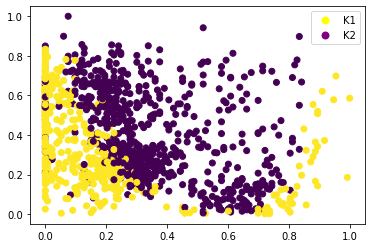

In [10]:
custom_lines = [Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', markersize=9),
                Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', markersize=9)]

plt.scatter(X.iloc[:,0], X.iloc[:, 1], c=y)
plt.legend(custom_lines, ['K1', 'K2'])

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.2)

In [4]:
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [13]:
network = MLPClassifier(solver='sgd',hidden_layer_sizes=(5, 5), max_iter = 1000, tol = 0.001, activation = 'identity')
network.fit(X_train,y_train)
predicted_labels = network.predict(X_test)
matrix = confusion_matrix(y_test, predicted_labels)
matrix

array([[140,   0],
       [ 99,   0]])

In [14]:
network.score(X_test,y_test)

0.5857740585774058

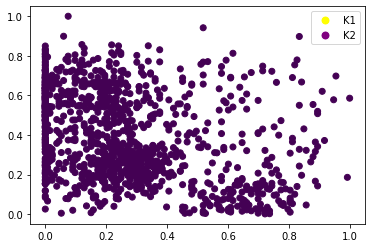

In [15]:
predicted_labels = network.predict(X)
plt.scatter(X.iloc[:,0], X.iloc[:, 1], c=predicted_labels)
plt.legend(custom_lines, ['K1', 'K2'])

In [16]:
network = MLPClassifier(solver='adam',hidden_layer_sizes=(100, 100), max_iter = 1000, tol = 0.001, activation = 'relu')
network.fit(X_train,y_train)
predicted_labels = network.predict(X_test)
matrix = confusion_matrix(y_test, predicted_labels)
print(matrix)
print(network.score(X_test,y_test))

[[130  10]
 [ 13  86]]
0.9037656903765691


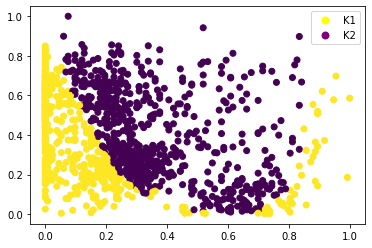

In [53]:
predicted_labels = network.predict(X)
plt.scatter(X.iloc[:,0], X.iloc[:, 1], c=predicted_labels)

plt.legend(custom_lines, ['K1', 'K2'])

In [57]:
network = MLPClassifier(solver='adam',hidden_layer_sizes=(10, 10), max_iter = 1000, tol = 0.001, activation = 'relu')
network.fit(X_train,y_train)
predicted_labels = network.predict(X_test)
matrix = confusion_matrix(y_test, predicted_labels)
print(matrix)
print(network.score(X_test,y_test))

[[131   9]
 [ 22  77]]
0.8702928870292888


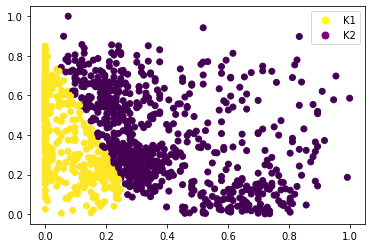

In [20]:
predicted_labels = network.predict(X)
plt.scatter(X.iloc[:,0], X.iloc[:, 1], c=predicted_labels)

plt.legend(custom_lines, ['K1', 'K2'])

In [45]:
network = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(10, 10), max_iter = 1000, tol = 0.001, activation = 'relu')
network.fit(X_train,y_train)
predicted_labels = network.predict(X_test)
matrix = confusion_matrix(y_test, predicted_labels)
print(matrix)
print(network.score(X_test,y_test))

[[131   9]
 [  8  91]]
0.9288702928870293


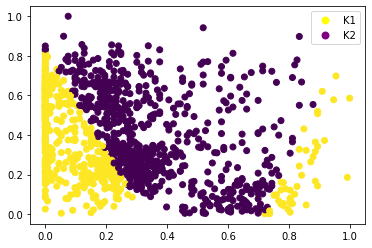

In [46]:
predicted_labels = network.predict(X)
plt.scatter(X.iloc[:,0], X.iloc[:, 1], c=predicted_labels)

plt.legend(custom_lines, ['K1', 'K2'])

In [47]:
network = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(3, 3, 3), max_iter = 1000, tol = 0.001, activation = 'relu')
network.fit(X_train,y_train)
predicted_labels = network.predict(X_test)
matrix = confusion_matrix(y_test, predicted_labels)
print(matrix)
print(network.score(X_test,y_test))

[[130  10]
 [  8  91]]
0.9246861924686193


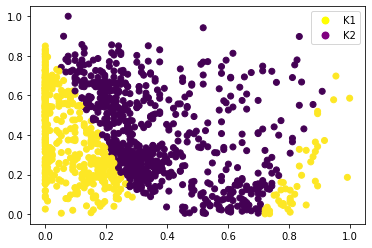

In [48]:
predicted_labels = network.predict(X)
plt.scatter(X.iloc[:,0], X.iloc[:, 1], c=predicted_labels)

plt.legend(custom_lines, ['K1', 'K2'])

In [49]:
network = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(3, 3, 3), max_iter = 1000, tol = 0.001, activation = 'relu')
network.fit(X_train,y_train)
predicted_labels = network.predict(X_test)
matrix = confusion_matrix(y_test, predicted_labels)
print(matrix)
print(network.score(X_test,y_test))

[[140   0]
 [ 99   0]]
0.5857740585774058


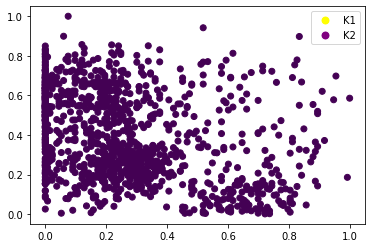

In [50]:
predicted_labels = network.predict(X)
plt.scatter(X.iloc[:,0], X.iloc[:, 1], c=predicted_labels)

plt.legend(custom_lines, ['K1', 'K2'])

In [51]:
network = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(100, 100, 100), max_iter = 5000, tol = 0.001, activation = 'relu')
network.fit(X_train,y_train)
predicted_labels = network.predict(X_test)
matrix = confusion_matrix(y_test, predicted_labels)
print(matrix)
print(network.score(X_test,y_test))

[[130  10]
 [ 10  89]]
0.9163179916317992


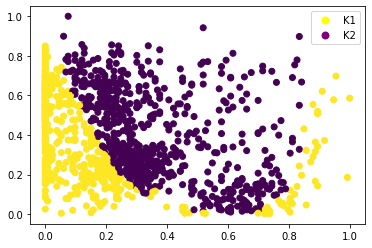

In [52]:
predicted_labels = network.predict(X)
plt.scatter(X.iloc[:,0], X.iloc[:, 1], c=predicted_labels)

plt.legend(custom_lines, ['K1', 'K2'])

#Zadanie 2

In [15]:
from sklearn.datasets import load_digits
from sklearn.metrics import balanced_accuracy_score

data = load_digits()
data.target
data.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [59]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, stratify = data.target, test_size=0.2)

In [72]:
network = MLPClassifier(solver='adam',hidden_layer_sizes=(100, 100), max_iter = 1000, tol = 0.001, activation = 'relu')
network.fit(X_train,y_train)
predicted_labels = network.predict(X_test)
matrix = confusion_matrix(y_test, predicted_labels)
print(matrix)
print(balanced_accuracy_score(y_test, predicted_labels))

[[36  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  0  0]
 [ 0  1  0  0 34  0  0  0  0  1]
 [ 0  0  0  0  0 35  0  0  0  1]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0  0 35  0  1]
 [ 0  1  0  0  0  0  0  1 32  1]
 [ 0  0  0  1  0  1  0  0  0 34]]
0.9747619047619048


#Zadanie 3

adam

In [81]:
network = MLPClassifier(solver='adam',hidden_layer_sizes=(10, 10), max_iter = 1000, activation = 'logistic')
network.fit(X_train,y_train)
predicted_labels = network.predict(X_test)
matrix = confusion_matrix(y_test, predicted_labels)
print(matrix)
print(balanced_accuracy_score(y_test, predicted_labels))

[[35  1  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  1  0]
 [ 0  1 33  0  0  0  0  0  1  0]
 [ 1  0  0 35  0  0  0  0  0  1]
 [ 0  1  0  0 35  0  0  0  0  0]
 [ 1  0  0  0  0 32  0  0  1  2]
 [ 0  1  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  1  0  0 35  0  0]
 [ 0  1  2  0  0  1  0  0 31  0]
 [ 0  0  0  2  0  1  0  2  1 30]]
0.9358601458601459


In [103]:
network = MLPClassifier(solver='adam',hidden_layer_sizes=(5, 5, 5, 5), max_iter = 1000, activation = 'relu')
network.fit(X_train,y_train)
predicted_labels = network.predict(X_test)
matrix = confusion_matrix(y_test, predicted_labels)
print(matrix)
print(balanced_accuracy_score(y_test, predicted_labels))

[[32  0  0  0  0  3  0  1  0  0]
 [ 0 30  0  0  0  0  1  0  6  0]
 [ 0  3 32  0  0  0  0  0  0  0]
 [ 0  0  0 35  0  1  0  0  0  1]
 [ 0  0  0  0 31  0  0  0  5  0]
 [ 5  0  0  0  0 29  0  0  1  1]
 [ 0  2  0  0  0  1 33  0  0  0]
 [ 0  0  0  0  0  1  0 34  1  0]
 [ 0  4  0  0  0  1  0  0 28  2]
 [ 0  0  0  2  2  1  0  4  0 27]]
0.8637709137709138


In [84]:
network = MLPClassifier(solver='adam',hidden_layer_sizes=(5, 5, 5, 5), max_iter = 1000, activation = 'tanh')
network.fit(X_train,y_train)
predicted_labels = network.predict(X_test)
matrix = confusion_matrix(y_test, predicted_labels)
print(matrix)
print(balanced_accuracy_score(y_test, predicted_labels))

[[ 8  0  0  0  0  0 28  0  0  0]
 [ 0  1  0 33  0  3  0  0  0  0]
 [ 0  0 32  3  0  0  0  0  0  0]
 [ 0  0  1 35  0  0  0  0  0  1]
 [ 2  0  0  0 32  1  0  1  0  0]
 [ 0  0  1  2  0 33  0  0  0  0]
 [ 1  0  1  0  0  0 34  0  0  0]
 [ 0  0  0  0  0 34  0  1  0  1]
 [ 0  0  0  3  0 28  0  1  0  3]
 [ 0  0  0  1  0  4  0  0  0 31]]
0.5748369798369797


In [105]:
network = MLPClassifier(solver='adam',hidden_layer_sizes=(5, 5, 5, 5), max_iter = 3000, activation = 'logistic')
network.fit(X_train,y_train)
predicted_labels = network.predict(X_test)
matrix = confusion_matrix(y_test, predicted_labels)
print(matrix)
print(balanced_accuracy_score(y_test, predicted_labels))

[[ 0  0  0  0  0 35  0  0  1  0]
 [ 0  1  0  1 34  0  0  1  0  0]
 [ 0  2  0  1 31  0  0  1  0  0]
 [ 0  0  1 28  2  0  0  4  1  1]
 [ 0  1  0  0 33  0  0  0  2  0]
 [ 0  0  0  1  0 29  0  1  1  4]
 [ 0  0  1  0 34  0  0  1  0  0]
 [ 0  0  0 23 12  0  0  1  0  0]
 [ 0  0  1  2  3  0  0  1 28  0]
 [ 0  0  0  2  0  4  0  0  4 26]]
0.40560060060060066


lbfgs

In [86]:
network = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(10, 10), max_iter = 1000, activation = 'relu')
network.fit(X_train,y_train)
predicted_labels = network.predict(X_test)
matrix = confusion_matrix(y_test, predicted_labels)
print(matrix)
print(balanced_accuracy_score(y_test, predicted_labels))

[[36  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  1  1  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 36  0  1  0  0  0  0]
 [ 0  1  0  0 35  0  0  0  0  0]
 [ 0  0  1  0  1 33  0  0  0  1]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  1  0  0  0  1  0  0 33  0]
 [ 0  0  0  0  0  1  0  0  0 35]]
0.9722887172887174


In [91]:
network = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(10, 10), max_iter =15000, activation = 'logistic')
network.fit(X_train,y_train)
predicted_labels = network.predict(X_test)
matrix = confusion_matrix(y_test, predicted_labels)
print(matrix)
print(balanced_accuracy_score(y_test, predicted_labels))

[[35  0  0  0  0  0  1  0  0  0]
 [ 0 33  2  1  0  0  0  0  1  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  1 34  0  0  0  0  0  2]
 [ 0  1  0  0 34  0  0  1  0  0]
 [ 0  0  0  2  1 32  0  0  0  1]
 [ 0  1  0  0  0  0 35  0  0  0]
 [ 1  1  0  1  1  0  0 31  0  1]
 [ 0  1  3  3  0  1  0  1 25  1]
 [ 0  1  0  0  0  2  0  1  0 32]]
0.9052874302874303


In [94]:
network = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(10, 10), max_iter = 15000, activation = 'tanh')
network.fit(X_train,y_train)
predicted_labels = network.predict(X_test)
matrix = confusion_matrix(y_test, predicted_labels)
print(matrix)
print(balanced_accuracy_score(y_test, predicted_labels))

[[34  0  0  0  1  1  0  0  0  0]
 [ 0 29  1  1  2  0  0  1  2  1]
 [ 0  1 33  0  0  0  1  0  0  0]
 [ 0  0  0 36  0  0  1  0  0  0]
 [ 0  1  0  0 34  0  0  0  1  0]
 [ 0  0  0  2  0 31  0  2  0  1]
 [ 0  1  0  1  3  0 31  0  0  0]
 [ 0  0  0  0  0  0  0 35  0  1]
 [ 0  4  2  1  1  1  0  1 23  2]
 [ 1  1  0  0  0  1  0  0  4 29]]
0.8745645645645647


In [109]:
network = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(5, 5, 5, 5), max_iter = 5000, activation = 'relu')
network.fit(X_train,y_train)
predicted_labels = network.predict(X_test)
matrix = confusion_matrix(y_test, predicted_labels)
print(matrix)
print(balanced_accuracy_score(y_test, predicted_labels))

[[35  0  0  0  1  0  0  0  0  0]
 [ 0 35  0  0  1  1  0  0  0  0]
 [ 7  0 18  2  0  1  0  0  7  0]
 [ 0  0  2 21  0  1 11  0  2  0]
 [ 0  3  0  0 32  0  0  0  0  1]
 [ 0  6  1  1  1 20  7  0  0  0]
 [ 0  2  0  7  0  7 20  0  0  0]
 [ 0  0  0  0  1  0  0 35  0  0]
 [ 1  1 11 12  1  3  0  0  6  0]
 [ 4  5 12  2  2  2  0  0  8  1]]
0.6171450021450021


sgd

In [96]:
network = MLPClassifier(solver='sgd',hidden_layer_sizes=(100, 100), max_iter = 1000, activation = 'relu')
network.fit(X_train,y_train)
predicted_labels = network.predict(X_test)
matrix = confusion_matrix(y_test, predicted_labels)
print(matrix)
print(balanced_accuracy_score(y_test, predicted_labels))

[[36  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  1  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 36  0  1  0  0  0  0]
 [ 0  1  0  0 34  0  0  0  0  1]
 [ 0  0  0  0  1 34  0  0  0  1]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  0  0  1  0  2  1  0 31  0]
 [ 0  0  0  1  0  1  0  0  0 34]]
0.9664993564993566


In [99]:
network = MLPClassifier(solver='sgd',hidden_layer_sizes=(10, 10), max_iter = 3000, activation = 'relu')
network.fit(X_train,y_train)
predicted_labels = network.predict(X_test)
matrix = confusion_matrix(y_test, predicted_labels)
print(matrix)
print(balanced_accuracy_score(y_test, predicted_labels))

[[35  0  0  0  0  1  0  0  0  0]
 [ 0 36  1  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 35  0  0  0  0  2  0]
 [ 0  2  0  0 34  0  0  0  0  0]
 [ 1  0  1  0  0 33  0  0  1  0]
 [ 0  1  0  0  0  0 35  0  0  0]
 [ 0  1  0  0  0  0  0 33  0  2]
 [ 0  2  0  3  0  1  1  0 27  1]
 [ 0  0  0  1  0  1  0  2  2 30]]
0.9245903045903047


In [101]:
network = MLPClassifier(solver='sgd', learning_rate='adaptive',hidden_layer_sizes=(10, 10), max_iter = 3000, activation = 'relu')
network.fit(X_train,y_train)
predicted_labels = network.predict(X_test)
matrix = confusion_matrix(y_test, predicted_labels)
print(matrix)
print(balanced_accuracy_score(y_test, predicted_labels))

[[35  0  0  0  1  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  2  0  0]
 [ 0  1 31  0  0  0  0  1  2  0]
 [ 0  0  0 36  0  1  0  0  0  0]
 [ 0  0  0  0 31  0  3  0  2  0]
 [ 0  0  0  1  0 31  1  0  1  2]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 1  1  0  0  0  0  0 34  0  0]
 [ 0  1  0  0  0  0  0  0 32  2]
 [ 0  3  0  1  0  0  0  0  0 32]]
0.9246696696696697


In [100]:
network = MLPClassifier(solver='sgd', learning_rate='invscaling',hidden_layer_sizes=(10, 10), max_iter = 3000, activation = 'relu')
network.fit(X_train,y_train)
predicted_labels = network.predict(X_test)
matrix = confusion_matrix(y_test, predicted_labels)
print(matrix)
print(balanced_accuracy_score(y_test, predicted_labels))

[[ 0  0  1  0  0  1  0 20 14  0]
 [ 0  0  0  0  0  0  0 33  4  0]
 [ 0  0  0  0  0  0  0 32  3  0]
 [ 0  0  0  0  0  0  0 27 10  0]
 [ 0  4  0  0  0 11  0 10  4  7]
 [ 0  0  0  0  0  0  0 28  8  0]
 [ 0  0  0  0  0  0  0 28  8  0]
 [ 0  2  0  0  0  5  0 26  3  0]
 [ 0  0  0  0  0  0  0 31  4  0]
 [ 0  0  0  0  2  0  0 26  8  0]]
0.08365079365079366


#Zadanie 4

In [22]:
from sklearn import preprocessing
import time
yeast = np.loadtxt('yeast.data', usecols = (1, 2, 3, 4, 5, 6, 7, 8))
yeast_labels_text = np.loadtxt('yeast.data', usecols=(9), dtype=str)

label_encoder = preprocessing.LabelEncoder()

yeast_labels = label_encoder.fit(yeast_labels_text).transform(yeast_labels_text)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(yeast, yeast_labels, stratify = yeast_labels, test_size=0.2)

In [24]:
network = MLPClassifier(solver='sgd',hidden_layer_sizes=(1000, 1000), max_iter = 1000, tol = 0.001, activation = 'relu')
st = time.time()
network.fit(X_train,y_train)
ed = time.time()
predicted_labels = network.predict(X_test)
matrix = confusion_matrix(y_test, predicted_labels)
print('time: ', ed-st)
print(matrix)
print(balanced_accuracy_score(y_test, predicted_labels))

time:  36.49883770942688
[[91  0  0  0  0  0  0  2  0  0]
 [ 1  0  0  0  0  0  0  0  0  0]
 [ 7  0  0  0  0  0  0  0  0  0]
 [ 9  0  0  0  0  0  0  0  0  0]
 [10  0  0  0  0  0  0  0  0  0]
 [31  0  0  0  0  0  0  1  0  0]
 [48  0  0  0  0  0  0  1  0  0]
 [77  0  0  0  0  0  0  9  0  0]
 [ 4  0  0  0  0  0  0  0  0  0]
 [ 6  0  0  0  0  0  0  0  0  0]]
0.10831457864466117


In [25]:
network = MLPClassifier(solver='adam',hidden_layer_sizes=(1000, 1000, 1000), max_iter = 1000, tol = 0.001, activation = 'relu')
st = time.time()
network.fit(X_train,y_train)
ed = time.time()
predicted_labels = network.predict(X_test)
matrix = confusion_matrix(y_test, predicted_labels)
print('time: ', ed-st)
print(matrix)
print(balanced_accuracy_score(y_test, predicted_labels))

time:  221.5750482082367
[[66  0  0  0  0  1  3 23  0  0]
 [ 0  1  0  0  0  0  0  0  0  0]
 [ 1  0  2  4  0  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  0  0  0]
 [ 0  0  0  1  6  1  1  0  0  1]
 [ 1  0  0  0  3 23  2  3  0  0]
 [16  0  0  0  0  3 24  6  0  0]
 [36  1  0  0  1  3  2 43  0  0]
 [ 1  0  0  0  0  0  1  0  2  0]
 [ 1  0  1  1  0  0  0  3  0  0]]
0.5803937623436471


In [26]:
network = MLPClassifier(solver='adam',hidden_layer_sizes=(1000, 1000), max_iter = 1000, tol = 0.001, activation = 'logistic', learning_rate='adaptive')
st = time.time()
network.fit(X_train,y_train)
ed = time.time()
predicted_labels = network.predict(X_test)
matrix = confusion_matrix(y_test, predicted_labels)
print('time: ', ed-st)
print(matrix)
print(balanced_accuracy_score(y_test, predicted_labels))

time:  93.40793037414551
[[80  0  0  0  0  0  5  8  0  0]
 [ 0  0  1  0  0  0  0  0  0  0]
 [ 1  0  2  2  0  0  2  0  0  0]
 [ 0  0  1  6  1  0  1  0  0  0]
 [ 2  0  1  2  1  4  0  0  0  0]
 [10  0  0  0  0 20  0  2  0  0]
 [22  0  0  0  1  2 22  2  0  0]
 [54  0  0  0  0  0  4 28  0  0]
 [ 1  0  0  0  0  0  1  0  2  0]
 [ 4  0  0  0  1  0  1  0  0  0]]
0.3812156993329965


In [27]:
network = MLPClassifier(solver='adam',hidden_layer_sizes=(100, 100, 100, 100), max_iter = 1000, tol = 0.001, activation = 'relu')
st = time.time()
network.fit(X_train,y_train)
ed = time.time()
predicted_labels = network.predict(X_test)
matrix = confusion_matrix(y_test, predicted_labels)
print('time: ', ed-st)
print(matrix)
print(balanced_accuracy_score(y_test, predicted_labels))

time:  6.9336097240448
[[63  0  0  0  0  1  8 21  0  0]
 [ 0  1  0  0  0  0  0  0  0  0]
 [ 1  0  3  3  0  0  0  0  0  0]
 [ 0  0  1  8  0  0  0  0  0  0]
 [ 1  0  1  3  3  2  0  0  0  0]
 [ 2  0  0  0  1 26  0  2  0  1]
 [11  0  0  0  0  3 32  3  0  0]
 [27  1  0  0  0  2  7 49  0  0]
 [ 1  0  0  0  0  0  1  0  2  0]
 [ 3  0  1  0  0  0  1  1  0  0]]
0.5830208338649288


In [28]:
network = MLPClassifier(solver='adam',hidden_layer_sizes=(1000, 1000), max_iter = 1000, tol = 0.001, activation = 'relu')
st = time.time()
network.fit(X_train,y_train)
ed = time.time()
predicted_labels = network.predict(X_test)
matrix = confusion_matrix(y_test, predicted_labels)
print('time: ', ed-st)
print(matrix)
print(balanced_accuracy_score(y_test, predicted_labels))

time:  88.02291989326477
[[71  0  0  0  0  0  6 16  0  0]
 [ 0  1  0  0  0  0  0  0  0  0]
 [ 1  0  3  3  0  0  0  0  0  0]
 [ 0  0  0  8  1  0  0  0  0  0]
 [ 1  0  0  2  5  2  0  0  0  0]
 [ 2  0  0  0  1 26  1  2  0  0]
 [15  0  0  0  1  3 28  2  0  0]
 [35  1  0  0  0  2  4 44  0  0]
 [ 1  0  0  0  1  0  0  0  2  0]
 [ 3  0  1  1  0  0  0  1  0  0]]
0.5976457656080687


In [29]:
predicted_labels = network.predict(X_train)
matrix = confusion_matrix(y_train, predicted_labels)
print(matrix)
print(balanced_accuracy_score(y_train, predicted_labels))

[[273   0   0   0   2   4  24  66   1   0]
 [  0   4   0   0   0   0   0   0   0   0]
 [  3   0  17   3   2   0   2   1   0   0]
 [  0   0   1  32   1   0   1   0   0   0]
 [  5   0   3   3  22   3   2   3   0   0]
 [  5   0   0   0   0 112   6   8   0   0]
 [ 51   0   1   2   5   3 125   8   0   0]
 [121   0   1   0   2  15  20 184   0   0]
 [  5   0   0   1   1   0   0   0   9   0]
 [ 11   0   2   0   1   7   1   2   0   0]]
0.6390782396894824
